In [1]:
from src import esma

In [2]:
#Step 1 - Initialize model
model = esma.project(project_id="C") #Initialize model
model.set_cores(8) #Define number of processing cores
model.get_structure(format='poscar',path='./database/structures/2D/',name='C.poscar') #Load structure
model.set_pseudo(path='./database/pseudos/PBE/US/')
model.ecutwfc(120) #Wavefunction cut-off
model.k_points(8) #k mesh 
model.degauss(0.05) #degauss value
model.conv_thr("1e-8") #electron convergence threshold
model.smearing('fd') #Marzari-Vanderbilt smearing

In [3]:
model.debug=True

In [4]:
#Step 2 - Crystal optimization
model.calculate('vc-relax')

In [5]:
#Step 3 - Atomic optimization
model.get_structure('vc-relax') #Get vc-relaxed strucutre
model.make_layer(layer_type='mono') #mono layer 
model.k_points([8,8,1])
model.calculate('relax')

In [6]:
#Step 4 - Scf calculation
model.get_structure('relax') #Get relaxed strucutre
model.nbnd(10)
model.calculate('scf')

In [7]:
#Step 5 - Bands calculation
path = ['GAMMA','M','K','GAMMA'] #choose corners
model.band_points(path,number=40) #define path
model.calculate('bands')

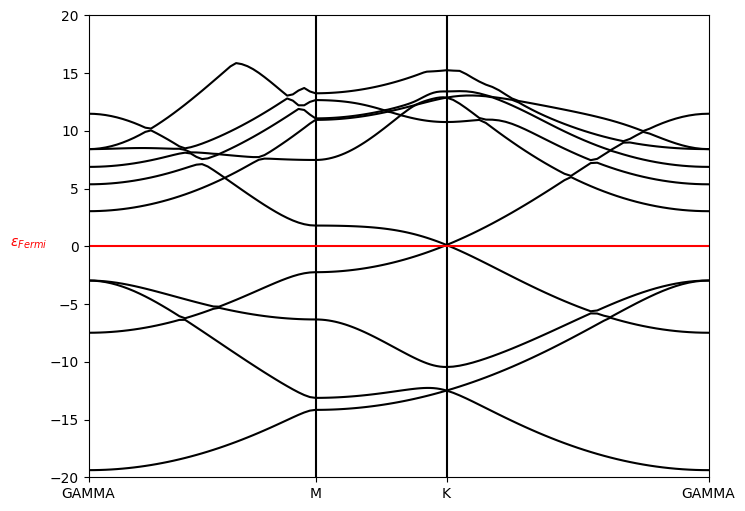

In [8]:
#Step 6 - Plotting
model.plot('electron',ylim=[-20,20],save=True) #plot electron bands

In [9]:
model.k_points([16,16,1],grid=True) #k mesh 
model.calculate('nscf')


In [10]:
model.calculate('wannier90')

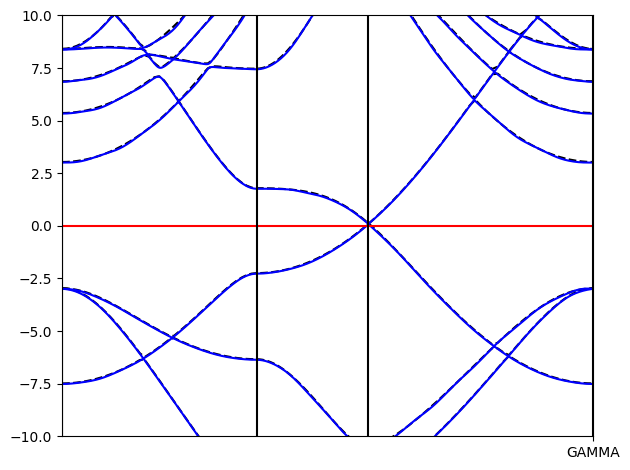

In [12]:
model.plot(calculation='wannier90',ylim=[-10,10])